# GRU --(案例二) 股票预测

In [42]:
# ------------------------------------------导入库文件
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

In [43]:
# ------------------------------------------读取文件（选择特征）
data_raw = pd.read_csv('zgpa_train.csv')
data = data_raw['close']
data = (data-min(data))/(max(data)-min(data))
print(data.head())

0    0.099027
1    0.107782
2    0.108366
3    0.093580
4    0.096887
Name: close, dtype: float64


In [44]:
# ------------------------------------特征处理（划分出每一个输出和输出）
dataset = []
for i in range(len(data)-8):
    dataset.append([a for a in data[i:i+9]])
dataset = np.array(dataset)
print(dataset.shape)

(723, 9)


In [45]:
# ------------------------------------------数据集和验证集的划分
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
# ------------------------------------------
train_data = dataset[:train_size]
test_data = dataset[train_size:]
# ------------------------------------------输入和输出的划分（前八个输入，第九个输出）
x = train_data[:,:-1]
y = train_data[:,-1]
# ------------------------------------------
print(x.shape)
print(y.shape)

(578, 8)
(578,)


In [46]:
# -------------------------------将数据转换为torch张量
x = torch.from_numpy(x).float().unsqueeze(-1)
y = torch.from_numpy(y).float().unsqueeze(-1)

In [47]:
print(x.shape)
print(y.shape)

torch.Size([578, 8, 1])
torch.Size([578, 1])


## 建立模型

#### input_size = 1
#### batch_size = 578  //  145  (723) 这里建议取相同值【16，32】
#### output_size = 1
#### squ_len = 8
#### num_layers = 2
#### hidden_size = 32
#### epoch = 100

In [48]:
class gru(nn.Module):
    def __init__(self):
        super(gru, self).__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=32, num_layers=2, batch_first=True)
        self.fc = nn.Linear(32,1)
    def forward(self, x_):
        h0 = torch.zeros(2,x_.shape[0],32)    # [num_layer,batch_size,hidden_size]
        out,hn = self.gru(x_,h0)
        out = self.fc(out[:,-1,:])
        return out

model = gru()

## 训练

In [49]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
model.train()
loss_list = []
for epoch in range(100):
    y_pred = model(x)
    loss = criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch: ', epoch, 'Loss: ', loss.item())
    loss_list.append(loss.item())

Epoch:  0 Loss:  0.20633834600448608
Epoch:  1 Loss:  0.18820542097091675
Epoch:  2 Loss:  0.17151226103305817
Epoch:  3 Loss:  0.15622705221176147
Epoch:  4 Loss:  0.14231230318546295
Epoch:  5 Loss:  0.12972061336040497
Epoch:  6 Loss:  0.11841417104005814
Epoch:  7 Loss:  0.10837206244468689
Epoch:  8 Loss:  0.09958891570568085
Epoch:  9 Loss:  0.09207063168287277
Epoch:  10 Loss:  0.08582697808742523
Epoch:  11 Loss:  0.08085841685533524
Epoch:  12 Loss:  0.07713650166988373
Epoch:  13 Loss:  0.07458354532718658
Epoch:  14 Loss:  0.07305768132209778
Epoch:  15 Loss:  0.0723453238606453
Epoch:  16 Loss:  0.07216665148735046
Epoch:  17 Loss:  0.07220426946878433
Epoch:  18 Loss:  0.07215427607297897
Epoch:  19 Loss:  0.07178029417991638
Epoch:  20 Loss:  0.0709470734000206
Epoch:  21 Loss:  0.06962428241968155
Epoch:  22 Loss:  0.06786693632602692
Epoch:  23 Loss:  0.06578440219163895
Epoch:  24 Loss:  0.06350880861282349
Epoch:  25 Loss:  0.06116880849003792
Epoch:  26 Loss:  0.0588

In [50]:
print(loss_list)

[0.20633834600448608, 0.18820542097091675, 0.17151226103305817, 0.15622705221176147, 0.14231230318546295, 0.12972061336040497, 0.11841417104005814, 0.10837206244468689, 0.09958891570568085, 0.09207063168287277, 0.08582697808742523, 0.08085841685533524, 0.07713650166988373, 0.07458354532718658, 0.07305768132209778, 0.0723453238606453, 0.07216665148735046, 0.07220426946878433, 0.07215427607297897, 0.07178029417991638, 0.0709470734000206, 0.06962428241968155, 0.06786693632602692, 0.06578440219163895, 0.06350880861282349, 0.06116880849003792, 0.05887164920568466, 0.05669331178069115, 0.05467568337917328, 0.05282868444919586, 0.051135625690221786, 0.04956012964248657, 0.0480535626411438, 0.046562228351831436, 0.0450337678194046, 0.043422549962997437, 0.041693802922964096, 0.03982650861144066, 0.03781486675143242, 0.0356685072183609, 0.033411119133234024, 0.03107760287821293, 0.028709450736641884, 0.02634855918586254, 0.024029893800616264, 0.021774478256702423, 0.019584881141781807, 0.017446

## 画损失函数图

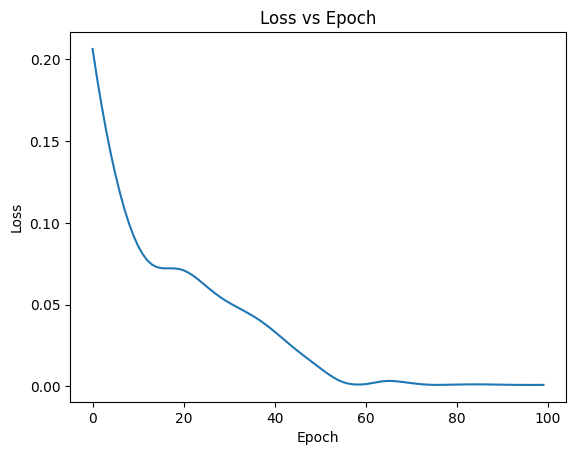

In [51]:
fig = plt.figure()
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

### 预测

In [52]:
model.eval()
x_p = test_data[:,:-1]
y_v = test_data[:,-1]
x_p= torch.from_numpy(x_p).float().unsqueeze(-1)
y_p = model(x_p)

In [53]:
y_p = y_p.detach().numpy()
y_p = np.ravel(y_p)   # ravel-数据平铺
y_v = np.ravel(y_v)
print(y_p)

[0.68046516 0.677805   0.6761792  0.68035084 0.68950427 0.69783187
 0.70552015 0.7105902  0.71638024 0.72207654 0.7280159  0.73336446
 0.73855877 0.73802805 0.73283815 0.7250738  0.71596885 0.7039383
 0.6909162  0.67404664 0.6555657  0.6445649  0.62964654 0.6170789
 0.60493153 0.5952745  0.59107435 0.59601295 0.6031548  0.60605216
 0.6128559  0.6187191  0.6227696  0.6255641  0.62589186 0.6263983
 0.6338122  0.64520633 0.6572702  0.66988176 0.6787219  0.68388426
 0.68863356 0.69211924 0.688917   0.6799123  0.66743207 0.65474546
 0.6489155  0.64387965 0.64449656 0.6480842  0.65197754 0.65420234
 0.64991945 0.6422368  0.63157237 0.62545186 0.62408626 0.63049257
 0.64369965 0.65958977 0.67858326 0.69454646 0.70752084 0.71673226
 0.72209203 0.72405446 0.7290052  0.7307618  0.7277291  0.72698665
 0.7255708  0.7229959  0.717679   0.7158971  0.71693224 0.7200476
 0.7271027  0.7364675  0.74648327 0.7618784  0.77838695 0.79336023
 0.80428654 0.8159157  0.8161784  0.81087077 0.80350983 0.78724265

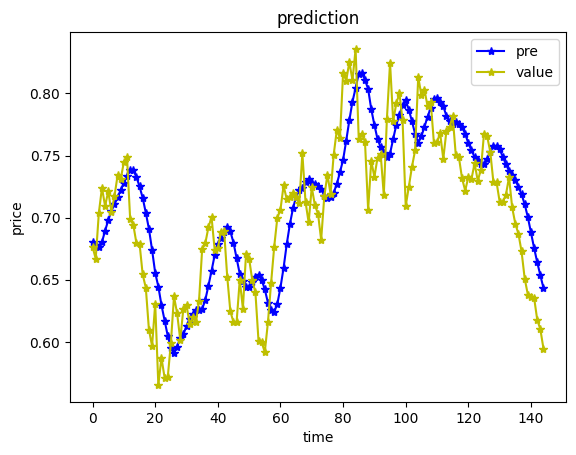

In [54]:
fig2 = plt.figure()
plt.plot(y_p,'*-b',label='pre')
plt.plot(y_v,'*-y',label='value')
plt.title('prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [55]:
print(y_p.shape)

(145,)
